In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import analyze_utils

save_dir = '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3'

r, all_losses = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, include_losses=True, save_file='r.pkl')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 942/942 [01:02<00:00, 15.10it/s]


In [22]:
top_prompts = (
    r.sort_values(by='prefix_train_loss', ascending=False)
     .groupby(['task_name', 'seed', 'checkpoint', 'iprompt_generation_checkpoint'])
).first().reset_index()

In [34]:
GPTJ = 'EleutherAI/gpt-j-6B'
dict(top_prompts[
      (top_prompts['checkpoint'] == GPTJ)
    & (top_prompts['iprompt_generation_checkpoint'] == GPTJ)
].iloc[0])

{'task_name': 'add_two',
 'seed': 6,
 'checkpoint': 'EleutherAI/gpt-j-6B',
 'iprompt_generation_checkpoint': 'EleutherAI/gpt-j-6B',
 'model_cls': 'iprompt',
 'batch_size': 16,
 'n_epochs': 100,
 'max_n_steps': 10000000000,
 'max_n_datapoints': 5000,
 'train_split_frac': 1.0,
 'max_dset_size': 5000,
 'early_stopping_steps': 50,
 'max_digit': 10,
 'template_num_init_string': 0,
 'template_num_task_phrasing': 0,
 'save_dir': '/home/jxm3/research/prompting/interpretable-autoprompting/results_icml/ablation3',
 'epoch_save_interval': 1,
 'lr': 0.0001,
 'gamma': 0.0,
 'n_shots': 5,
 'autoprompt_init_strategy': 'the',
 'max_length': 64,
 'single_shot_loss': 1,
 'mask_possible_answers': 0,
 'hotflip_num_candidates': 10,
 'accum_grad_over_epoch': 0,
 'num_learned_tokens': 6,
 'use_preprefix': 0,
 'iprompt_preprefix_str': '',
 'iprompt_pop_size': 4,
 'iprompt_num_mutations': 2,
 'iprompt_generation_repetition_penalty': 2.0,
 'iprompt_generation_temp': 1.0,
 'iprompt_generation_top_p': 1.0,
 'ipro

In [4]:
top_prompts.groupby(['checkpoint', 'iprompt_generation_checkpoint']).mean()['reciprocal_rank']

checkpoint               iprompt_generation_checkpoint
EleutherAI/gpt-j-6B      EleutherAI/gpt-j-6B              0.241185
                         EleutherAI/gpt-neo-1.3B          0.159009
                         EleutherAI/gpt-neo-125M          0.085832
                         EleutherAI/gpt-neo-2.7B          0.151711
EleutherAI/gpt-neo-1.3B  EleutherAI/gpt-j-6B              0.096227
                         EleutherAI/gpt-neo-1.3B          0.035432
                         EleutherAI/gpt-neo-125M          0.011833
                         EleutherAI/gpt-neo-2.7B          0.109982
EleutherAI/gpt-neo-125M  EleutherAI/gpt-j-6B              0.067081
                         EleutherAI/gpt-neo-1.3B          0.090965
                         EleutherAI/gpt-neo-125M          0.067320
                         EleutherAI/gpt-neo-2.7B          0.074115
EleutherAI/gpt-neo-2.7B  EleutherAI/gpt-j-6B              0.170332
                         EleutherAI/gpt-neo-1.3B          0.098457
       

In [7]:
top_prompts_heatmap = (
    top_prompts
        .groupby(['checkpoint', 'iprompt_generation_checkpoint'])
        .mean()
        .reset_index()
        .pivot(index='checkpoint', columns='iprompt_generation_checkpoint', values='reciprocal_rank')
)


AXIS_ORDER = [
       'EleutherAI/gpt-neo-125M', 'EleutherAI/gpt-neo-1.3B',
       'EleutherAI/gpt-neo-2.7B', 'EleutherAI/gpt-j-6B'
]
# sort columns (x)
top_prompts_heatmap = top_prompts_heatmap[AXIS_ORDER]
# sort rows (y)?
top_prompts_heatmap = top_prompts_heatmap.sort_index(key=lambda index_list: [AXIS_ORDER.index(y) for y in index_list])
top_prompts_heatmap

iprompt_generation_checkpoint,EleutherAI/gpt-neo-125M,EleutherAI/gpt-neo-1.3B,EleutherAI/gpt-neo-2.7B,EleutherAI/gpt-j-6B
checkpoint,,,,
EleutherAI/gpt-neo-125M,0.067320,0.090965,0.074115,0.067081
EleutherAI/gpt-neo-1.3B,0.011833,0.035432,0.109982,0.096227
EleutherAI/gpt-neo-2.7B,0.033881,0.098457,0.131886,0.170332
EleutherAI/gpt-j-6B,0.085832,0.159009,0.151711,0.241185


Text(32.99999999999999, 0.5, 'Reranking Model Params')

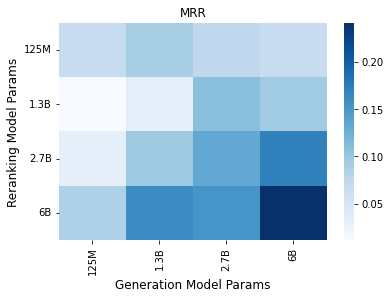

In [36]:
import seaborn as sns

SHORT_LABELS = ['125M', '1.3B', '2.7B', '6B']
ax = sns.heatmap(top_prompts_heatmap, cmap='Blues')
ax.set_xticklabels(SHORT_LABELS)
ax.set_yticklabels(SHORT_LABELS)
ax.set_title('MRR')
ax.set_xlabel('Generation Model Params', fontsize='large')
ax.set_ylabel('Reranking Model Params', fontsize='large')

<AxesSubplot:xlabel='prefix_train_acc', ylabel='reciprocal_rank'>

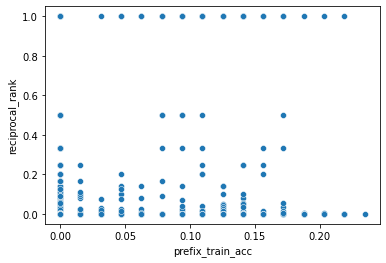

In [44]:
sns.scatterplot(data=top_prompts, x='prefix_train_acc', y='reciprocal_rank')